In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## 앙상블

In [11]:
# LogisticRegression 과 KNN model 개별 모델 생성
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=8)

# 소프트 보팅 기반 앙상블 모델 분류기 생성
vo_model = VotingClassifier(estimators=[("lr",lr_model),("knn",knn_model)], voting = "soft")

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2,
                                                   random_state = 156)

# VotingClassifier 학습/예측/평가
# 학습할 때는 개별 model 각각이 개별적으로 테스트 데이터에 대해서 학습하고, 
# 테스트 시에 각각 학습된 model로 예측 후 soft voting

vo_model.fit(X_train,y_train)
pred = vo_model.predict(X_test)
print("Voting 분류기 정확도 : {0:.4f}".format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_model, knn_model]
for model in classifiers:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("{} 분류기 정확도 : {:.4f}".format(model.__class__.__name__, accuracy_score(y_test, pred)))

Voting 분류기 정확도 : 0.9474
LogisticRegression 분류기 정확도 : 0.9386
KNeighborsClassifier 분류기 정확도 : 0.9386


## Decision Tree와 Random Forest

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 데이터 로드, train, test set 분할
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.3,
                                                   random_state = 0)

# 단일 Decision Tree 분류기와 randomforest 분류기 생성
dt_clf = DecisionTreeClassifier(random_state = 0)
rf_clf = RandomForestClassifier(random_state = 0)
models = [dt_clf,rf_clf]

# 두 모델의 학습/예측/평가 비교
for model in models:
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    print("train set {} 분류기 정확도 : {:.4f}".format(model.__class__.__name__, accuracy_score(y_train, train_pred)))
    test_pred = model.predict(X_test)
    print("test set {} 분류기 정확도 : {:.4f}".format(model.__class__.__name__, accuracy_score(y_test, test_pred)))

train set DecisionTreeClassifier 분류기 정확도 : 1.0000
test set DecisionTreeClassifier 분류기 정확도 : 0.8574
train set RandomForestClassifier 분류기 정확도 : 1.0000
test set RandomForestClassifier 분류기 정확도 : 0.9778


## 최적 hyperparameter 찾기

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2,
                                                   random_state = 156)

# n_estimators : 사용할 결정 트리의 개수
params = {"n_estimators":[100],
         "max_depth":[6,8,10,12],
         "min_samples_leaf" : [4,6,8],
         "min_samples_split" : [6,12,16],
          # 특성 추출에 무작위성이 있는 경우, 없는 경우
         "max_features" : [5, X_train.shape[1]]
         }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# n_jobs : 병렬적으로 사용할 CPU 코어 개수, -1은 모든 CPU 코어 사용
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print("최적 하이퍼 파라미터 : \n", grid_cv.best_params_)
print("최고 예측 정확도 : {:.4f}".format(grid_cv.best_score_))


최적 하이퍼 파라미터 : 
 {'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 100}
최고 예측 정확도 : 0.9517


In [122]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=6, min_samples_leaf = 4,
                                min_samples_split = 12, random_state = 0, max_features = 5)

rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print(accuracy_score(y_test,pred))

0.9473684210526315


## feature importance

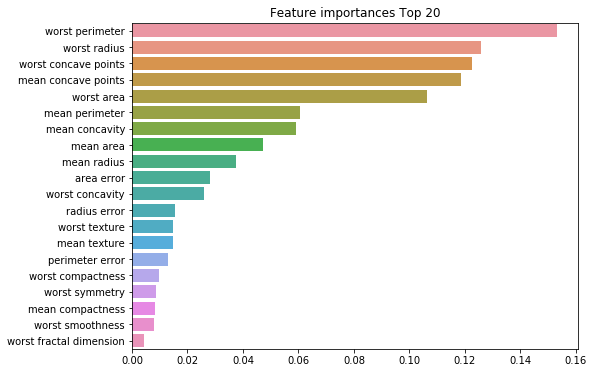

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=cancer.feature_names)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title("Feature importances Top 20")
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

In [126]:
ftr_importances_values

array([0.03751935, 0.01475334, 0.06048378, 0.04715388, 0.00368031,
       0.00816673, 0.0591467 , 0.11863725, 0.00119813, 0.00156437,
       0.01554983, 0.00189948, 0.01313618, 0.02826807, 0.00156466,
       0.00235064, 0.00146794, 0.00182938, 0.00106148, 0.00124276,
       0.12578567, 0.0149002 , 0.15323375, 0.10616997, 0.00780643,
       0.00980981, 0.02607925, 0.12262646, 0.00851057, 0.00440362])

## 실습

In [9]:
glass[:-1]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

glass = pd.read_csv("./glass_dataset.csv")
X_train, X_test, y_train, y_test = train_test_split(glass.iloc[:,:-1],glass.iloc[:,-1], test_size = 0.3, random_state=0)

n_features = X_train.shape[1]

max_features = [int(n_features**(1/2)), n_features]

rf_model = RandomForestClassifier(random_state = 0, n_estimators = 300)
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
print(accuracy_score(y_test, pred))
    
ftr_importances_values = rf_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
print(ftr_top20)

0.6923076923076923
Al    0.173923
Mg    0.165827
Ca    0.143431
RI    0.127339
Na    0.102459
Ba    0.095092
K     0.094193
Si    0.078539
Fe    0.019198
dtype: float64
